In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import pandas as pd
import numpy as np

from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the training dataset
df = pd.read_csv('train.csv')

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [5]:
# Check the data types of each column
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

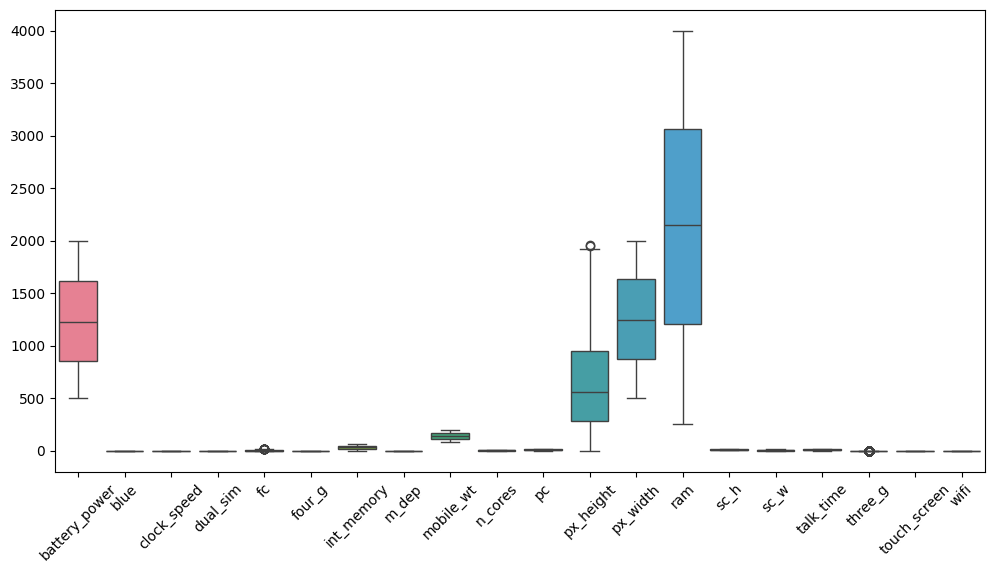

In [6]:
# Create box plots to visualize outliers.
X = df.drop('price_range', axis=1)
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.show()

In [7]:
# Utilize the IQR method to determine the quantity of outliers.
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Identify columns to exclude from outlier calculations due to having only two values, 0 and 1
exclude_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

outliers_dict = {}
total_outliers = 0
for column in X.select_dtypes(include=['number']).columns:
  if column not in exclude_columns:
    outliers = identify_outliers_iqr(X[column])
    num_outliers = len(outliers)
    outliers_dict[column] = num_outliers
    total_outliers += num_outliers

print("Number of outliers for each numerical column:", outliers_dict)
print("Total number of outliers across all numerical columns:", total_outliers)

Number of outliers for each numerical column: {'battery_power': 0, 'clock_speed': 0, 'fc': 18, 'int_memory': 0, 'm_dep': 0, 'mobile_wt': 0, 'n_cores': 0, 'pc': 0, 'px_height': 2, 'px_width': 0, 'ram': 0, 'sc_h': 0, 'sc_w': 0, 'talk_time': 0}
Total number of outliers across all numerical columns: 20


**Note: The 20 outlier values can be processed later by applying the StandardScaler function from scikit-learn.**

In [8]:
# Check for duplicated rows in the dataset.
duplicates_exist = df.duplicated().any()

if duplicates_exist:
    print("Dataset contains duplicated rows.")
else:
    print("Dataset does not contain duplicated rows.")

Dataset does not contain duplicated rows.


In [9]:
# Verify if the dataset contains any NaN values.
nan_values_exist = df.isnull().any().any()

if nan_values_exist:
    print("Dataset contains NaN values.")
else:
    print("Dataset does not contain NaN values.")

Dataset contains NaN values.


In [10]:
# Address missing values in the dataset.
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('price_range', axis=1)
y = data_imputed['price_range']

In [11]:
# Examine the issue of imbalanced dataset.
class_distribution = y.value_counts()

print(class_distribution)

price_range
1.0    500
2.0    500
3.0    500
0.0    500
Name: count, dtype: int64


**Note: The dataset is balanced**

<Figure size 1600x1600 with 0 Axes>

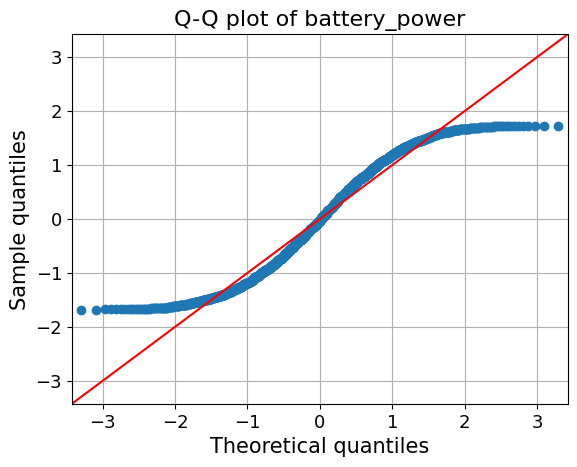

<Figure size 1600x1600 with 0 Axes>

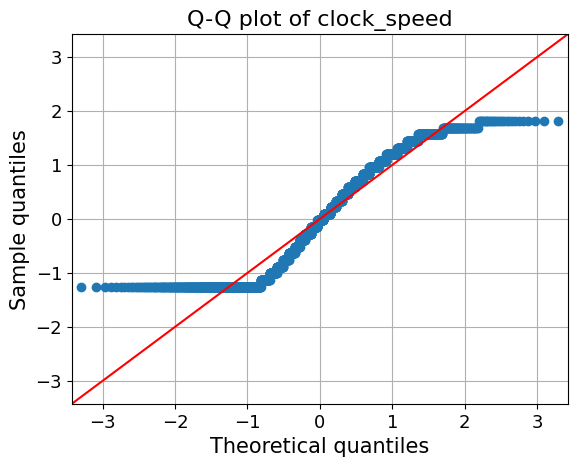

<Figure size 1600x1600 with 0 Axes>

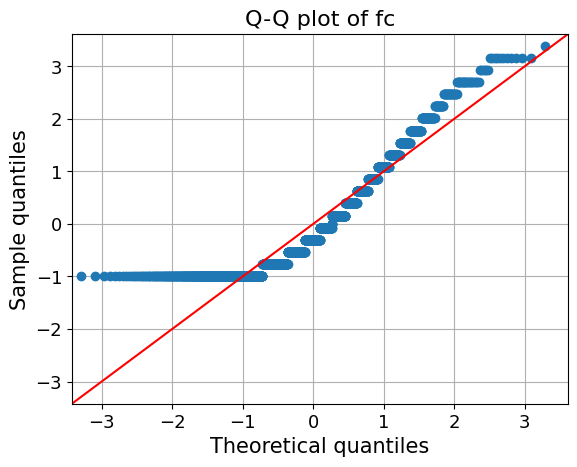

<Figure size 1600x1600 with 0 Axes>

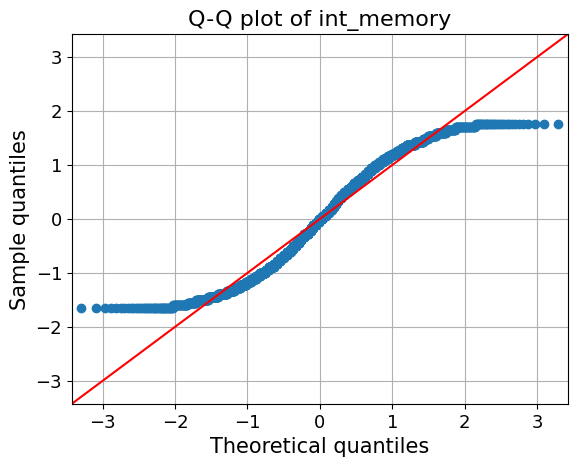

<Figure size 1600x1600 with 0 Axes>

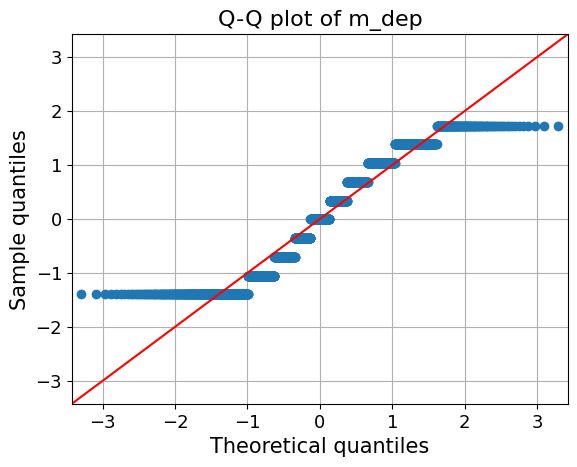

<Figure size 1600x1600 with 0 Axes>

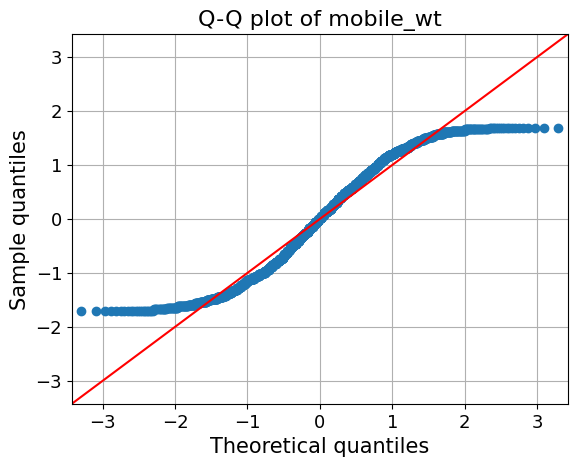

<Figure size 1600x1600 with 0 Axes>

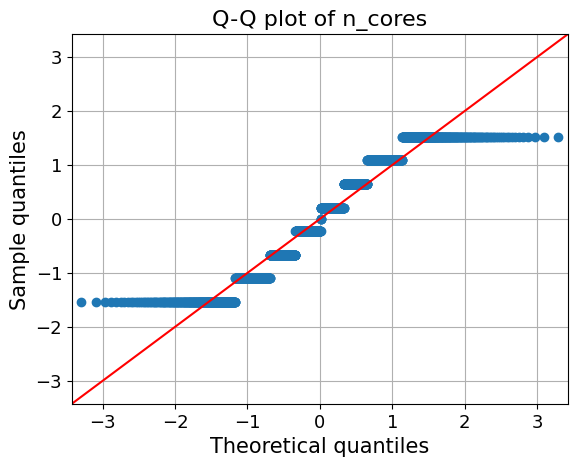

<Figure size 1600x1600 with 0 Axes>

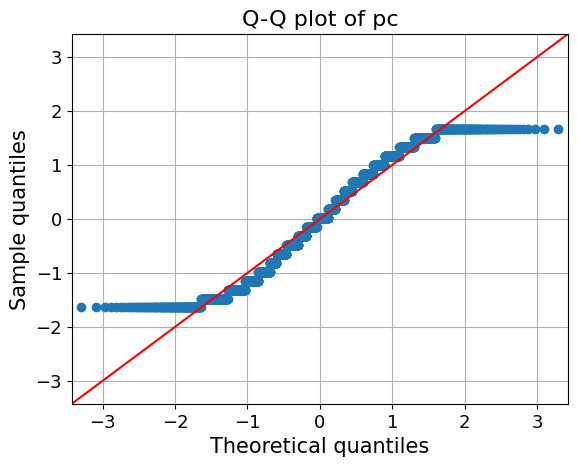

<Figure size 1600x1600 with 0 Axes>

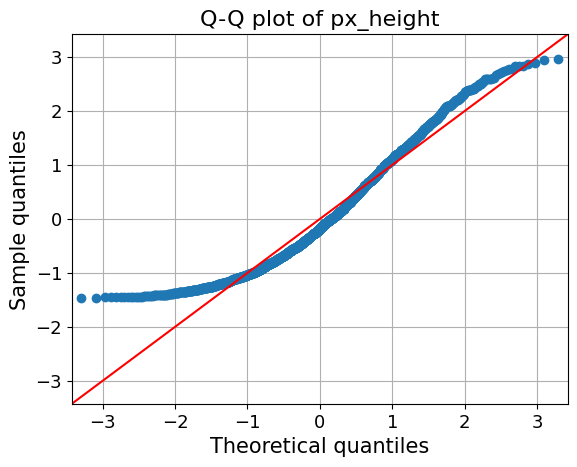

<Figure size 1600x1600 with 0 Axes>

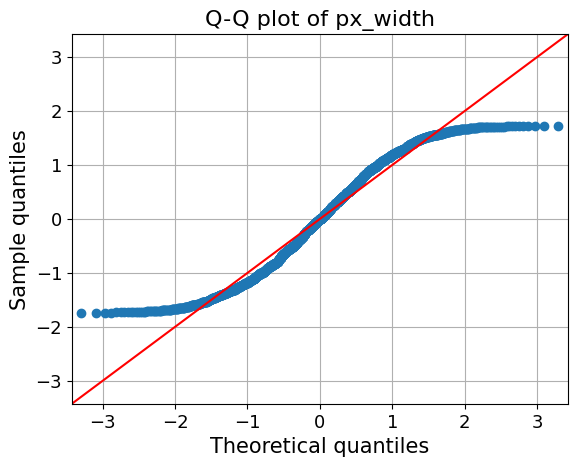

<Figure size 1600x1600 with 0 Axes>

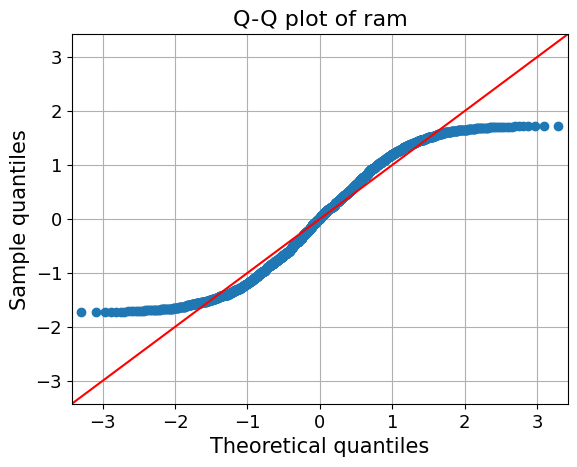

<Figure size 1600x1600 with 0 Axes>

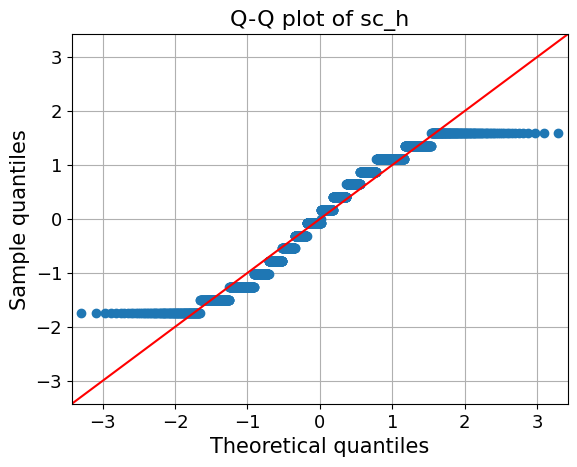

<Figure size 1600x1600 with 0 Axes>

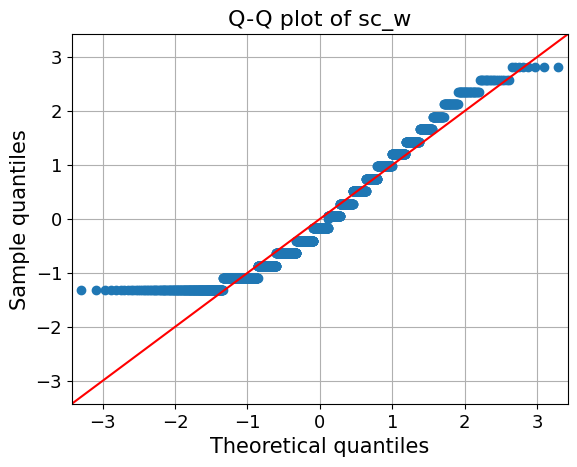

<Figure size 1600x1600 with 0 Axes>

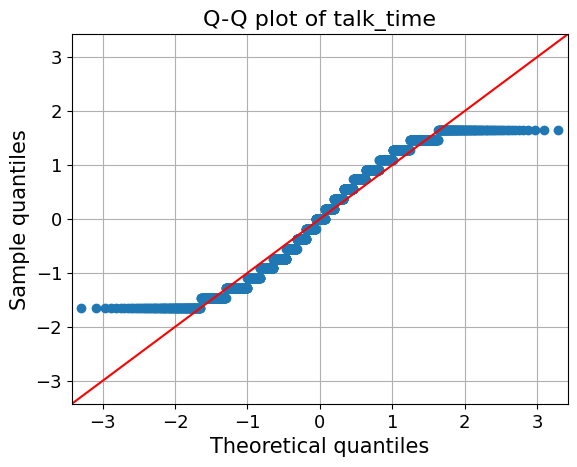

In [12]:
# Visualize the distribution of the numerical variables through plotting.
data_norm=df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(16,16))
  fig=qqplot(X[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**Note: The numeric variables exhibit a distribution that closely resembles the normal distribution.**

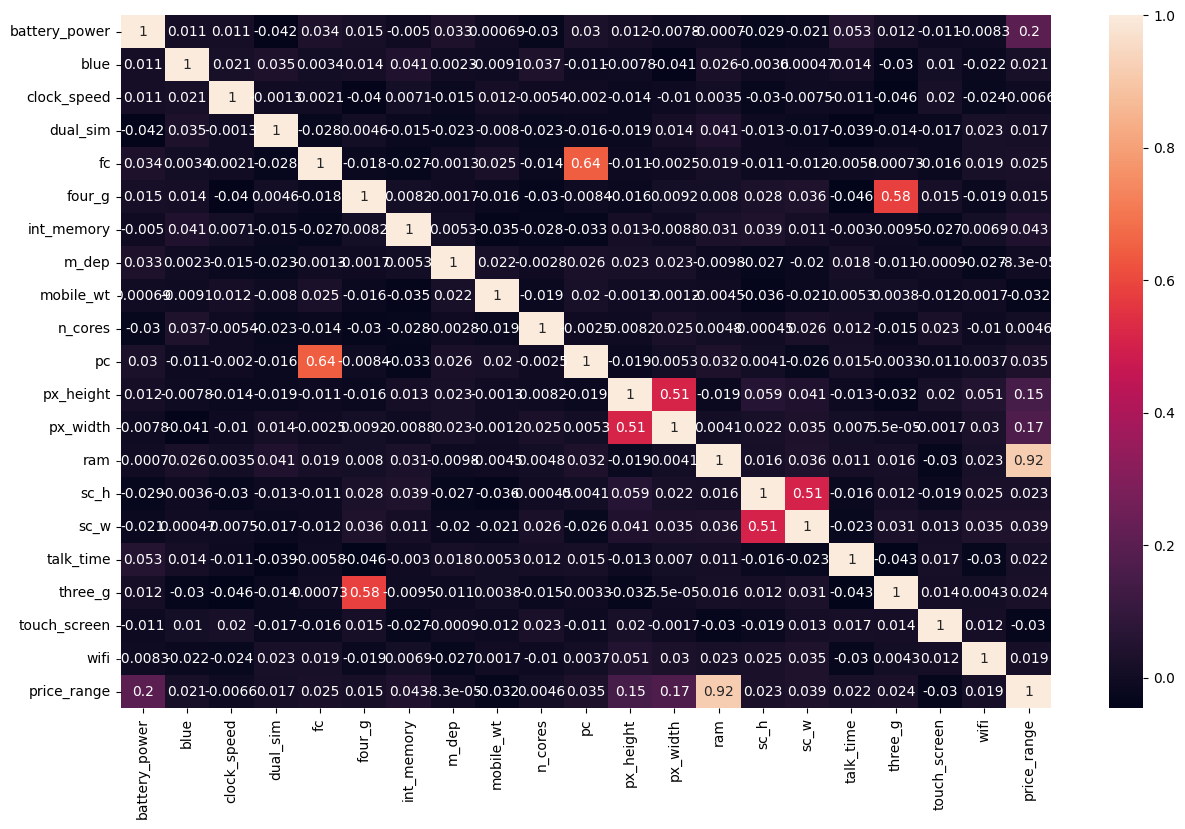

In [13]:
# Assessing the correlation between variables.
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Note: It is evident that 'ram' stands out as the most significant variable for predicting the 'price_range'. Additionally, 'battery_power', 'px_width', and 'px_height' are also identified as crucial predictors.**

<ipython-input-14-af4c15d4c93e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='ram', data=df, palette='Reds')


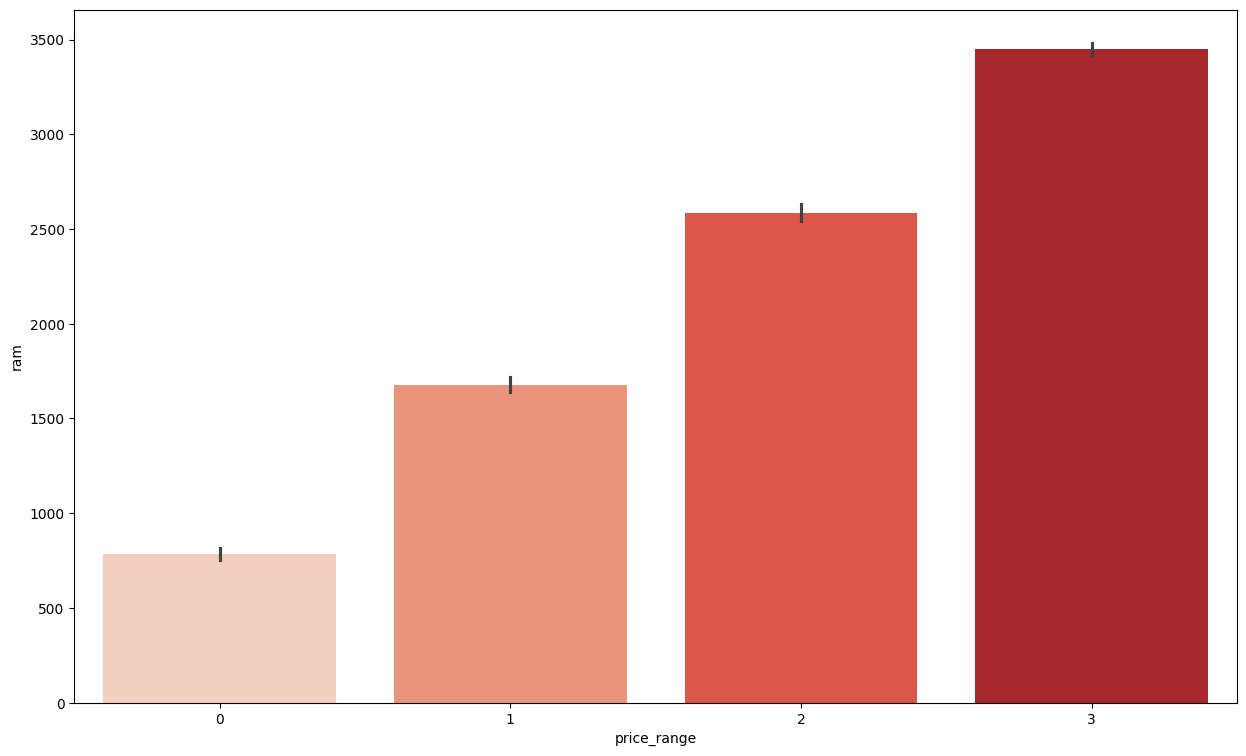

In [14]:
# Visualize the relationship between the price range and the 'ram' feature.
plt.figure(figsize=(15, 9))
sns.barplot(x='price_range', y='ram', data=df, palette='Reds')
plt.show()

**Note: Observing the plot, it is apparent that as the amount of RAM increases, the price range also tends to rise.**

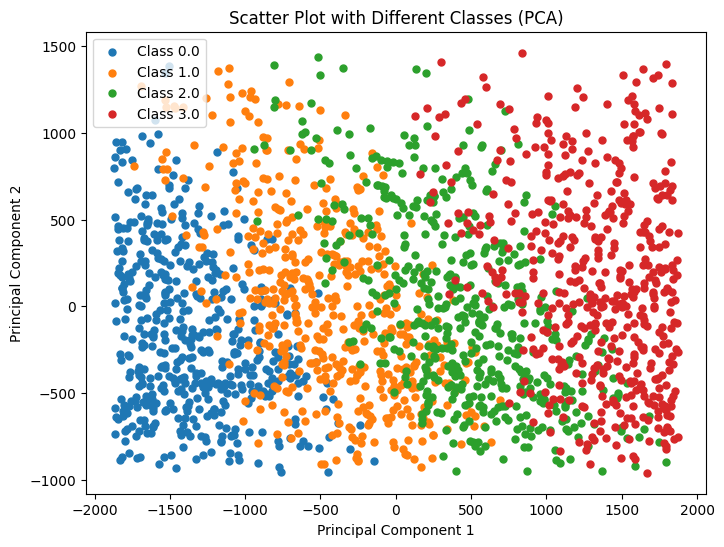

In [15]:
# Generate a scatter plot to assess the linearity of the dataset.

# Convert pandas DataFrames to numpy arrays
X_array = X.values
y_array = y.values

# Apply PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

# Create a scatter plot with different colors for each class based on PCA-transformed data
plt.figure(figsize=(8, 6))

# Iterate over unique classes in the target variable 'y'
for class_label in np.unique(y_array):
    # Filter data points by class label
    class_data = X_pca[y_array == class_label]

    # Plot data points for each class with a unique color
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}', s=25)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot with Different Classes (PCA)')
plt.legend()
plt.show()

**Note: To capture non-linear relationships and learn complex patterns in the data, I decided to utilize two models: a Multilayer Perceptron (MLP) and a non-linear Support Vector Machine (SVM).**

In [16]:
# Split the dataset into training and testing sets while ensuring to shuffle the data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Standardize the features in the dataset.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [17]:
# Initialize and train the Multi-Layer Perceptron (MLP) Classifier model.
MLP_model = MLPClassifier(hidden_layer_sizes=(2), activation='relu', solver='adam', max_iter=1000)
MLP_model.fit(X_train_scaled, y_train)

# Predict the target variable for the validation set.
y_pred_mlp = MLP_model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_mlp)
print(f'Accuracy of the MLP Classifier: {accuracy:.2f}')

Accuracy of the MLP Classifier: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


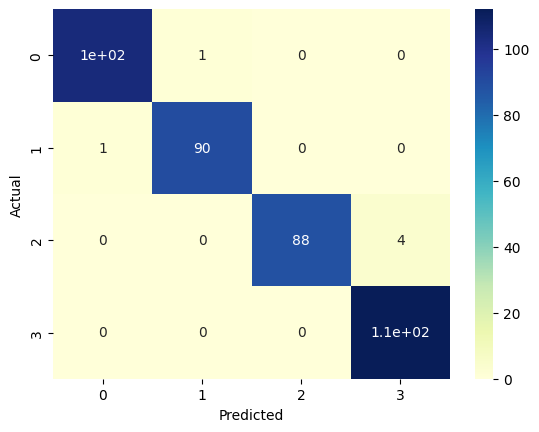

In [18]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_mlp)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Note: Considering that the dataset is balanced, calculating accuracy alone may be sufficient. However, for a more detailed insight into the model's performance on individual classes, it is recommended to calculate precision, recall, and F1-score for each class.**

In [19]:
# Calculate the precision, recall, F1-score, and support for each class
# to evaluate the model's performance in a multi-class classification scenario
class_report = classification_report(y_val, y_pred_mlp)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       105
         1.0       0.99      0.99      0.99        91
         2.0       1.00      0.96      0.98        92
         3.0       0.97      1.00      0.98       112

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [20]:
# Initialize the SVM classifier with a non-linear kernel ('rbf')
SVC_model = SVC(kernel='rbf', gamma='scale', max_iter=10000)

# Train the SVM classifier on the scaled training data
SVC_model.fit(X_train_scaled, y_train)

# Predict the target variable for the validation set
y_pred_svm = SVC_model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_svm)
print(f'Accuracy of the Non-linear SVM Classifier: {accuracy:.2f}')

Accuracy of the Non-linear SVM Classifier: 0.90


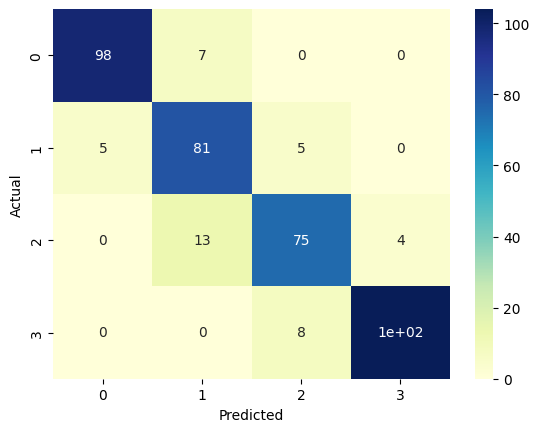

In [21]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_svm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Calculate precision, recall, F1-score, and support for each class
class_report = classification_report(y_val, y_pred_svm)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       105
         1.0       0.80      0.89      0.84        91
         2.0       0.85      0.82      0.83        92
         3.0       0.96      0.93      0.95       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [24]:
# Perform hyperparameter tuning using Grid Search to find the optimal hyperparameters
param_grid = {
    'hidden_layer_sizes': [(2), (5)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500, 1000],
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Predict the target variable for the validation set
y_pred = best_model.predict(X_val_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy of the best MLP Classifier after optimization: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy of the best MLP Classifier after optimization: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Prepare and preprocess the testing dataset**

In [25]:
# Load the testing dataset
test_df = pd.read_csv('test.csv')

test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [26]:
test_df = test_df.drop('id', axis=1)

test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [28]:
X_test_scaled = scaler.transform(test_df)

X_test_scaled

array([[-0.44896368,  1.01892912,  0.34926654, ..., -1.79489161,
         0.9900495 , -0.99750312],
       [-0.90744018,  1.01892912, -1.23622976, ...,  0.55713671,
        -1.0100505 , -0.99750312],
       [ 1.28507616,  1.01892912,  1.56887908, ..., -1.79489161,
         0.9900495 ,  1.00250313],
       ...,
       [-0.12666832, -0.98142253, -0.13857847, ...,  0.55713671,
        -1.0100505 , -0.99750312],
       [ 0.66318229,  1.01892912, -1.23622976, ..., -1.79489161,
         0.9900495 , -0.99750312],
       [ 0.06625496,  1.01892912, -1.23622976, ...,  0.55713671,
        -1.0100505 ,  1.00250313]])

In [31]:
# Make predictions for 10 devices in the test set using the MLP trained model
y_pred = MLP_model.predict(X_test_scaled[0:10])
y_pred

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0.])

In [32]:
# Predict the target variable for the entire test set
y_pred = MLP_model.predict(X_test_scaled)
y_pred.shape

(1000,)

In [33]:
test_df['predicted_price'] = y_pred

In [34]:
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3.0
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3.0
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3.0
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1.0


In [35]:
test_df.shape

(1000, 21)

#**Important Note: I apologize for not being able to complete the project and finish the back-end task on time. The timing of the task assignment was challenging for me, and I ran out of time.**

****